# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
from sklearn.model_selection import train_test_split

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

# Scale 8-bit color values in images to -1 to 1 range
X_train = (X_train - 128.) / 128.
X_test = (X_test - 128.) / 128.

# from Haoqing Geng - https://www.facebook.com/groups/559334230922042/permalink/578928342295964/
# prepare another batch of data that combines test and training, shuffles and redistributes 
all_x_data = np.vstack((X_train, X_test))
all_y_data = np.append(y_train, y_test)
X_train, X_test, y_train, y_test = train_test_split(all_x_data, all_y_data, test_size = 0.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
import numpy as np

# Check lengths
assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples.
n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 33176
Number of validation examples = 8295
Number of testing examples = 10368
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

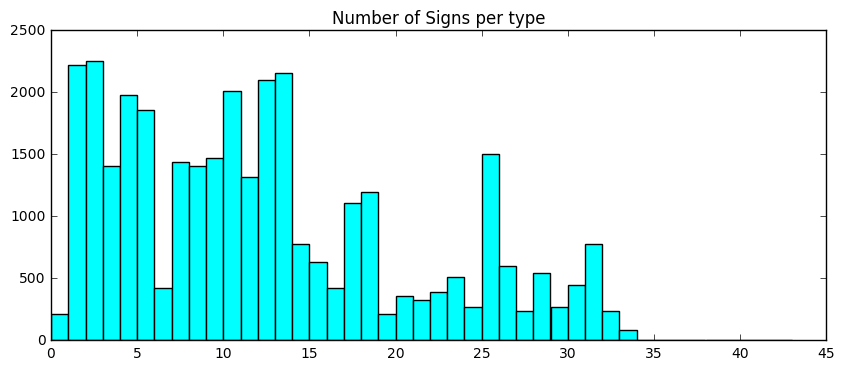

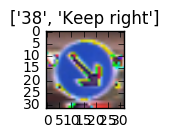

In [54]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import numpy as np
import csv
# Visualizations will be shown in the notebook.
%matplotlib inline

# Show class distribution in bar chart
bar_chart_y = [] 
bar_chart_x = range(n_classes)
for n in range(n_classes):
    label_count = 0
    for i in range(n_train):
        if (train['labels'][i] == n):
            label_count += 1
    bar_chart_y.append(label_count)
plt.figure(figsize=(10,4))
plt.title("Number of Signs per type")
plt.bar(bar_chart_x, bar_chart_y, 1, color="cyan")

with open('signnames.csv','r') as name:
    reader = csv.reader(name)
    names = list(reader)

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.title(names[y_train[index]+1])
plt.imshow(image)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [5]:
import tensorflow as tf

EPOCHS = 15
BATCH_SIZE = 300

In [6]:
from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob):    
    # Hyperparameters
    mu = 0
    #sigma = 0.1
    sigma = 0.075
    conv1_W_out = 6
    conv2_W_out = 16
    fc1_W_in = 400 # 5x5x16
    fc1_W_out = 120
    fc2_W_in = fc1_W_out
    fc2_W_out = 84
    fc3_W_in = fc2_W_out
    fc3_W_out = n_classes
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout
    #fc1    = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # Dropout
    fc2    = tf.nn.dropout(fc2, keep_prob)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [7]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
#one_hot_y = tf.one_hot(y, 43)
# workaround for cudnn windows bug
# see https://github.com/tensorflow/tensorflow/issues/6509
num_labels = n_classes
sparse_labels = tf.reshape(y, [-1, 1])
derived_size = tf.shape(sparse_labels)[0]
indices = tf.reshape(tf.range(0, derived_size, 1), [-1, 1])
concated = tf.concat(1, [indices, sparse_labels])
outshape = tf.concat(0, [tf.reshape(derived_size, [1]), tf.reshape(num_labels, [1])])
one_hot_y = tf.sparse_to_dense(concated, outshape, 1.0, 0.0)

keep_prob = tf.placeholder(tf.float32)

In [8]:
#rate = 0.00125
rate = 0.00175

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
#cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [9]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [10]:
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, '.\lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.590

EPOCH 2 ...
Validation Accuracy = 0.839

EPOCH 3 ...
Validation Accuracy = 0.904

EPOCH 4 ...
Validation Accuracy = 0.931

EPOCH 5 ...
Validation Accuracy = 0.953

EPOCH 6 ...
Validation Accuracy = 0.957

EPOCH 7 ...
Validation Accuracy = 0.966

EPOCH 8 ...
Validation Accuracy = 0.964

EPOCH 9 ...
Validation Accuracy = 0.971

EPOCH 10 ...
Validation Accuracy = 0.977

EPOCH 11 ...
Validation Accuracy = 0.977

EPOCH 12 ...
Validation Accuracy = 0.978

EPOCH 13 ...
Validation Accuracy = 0.979

EPOCH 14 ...
Validation Accuracy = 0.982

EPOCH 15 ...
Validation Accuracy = 0.982

Model saved


In [11]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.984


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

The first step was the normalize the pixel data, to scale it to the -1 to 1 range this reduces computation errors.  This alone improved the validation accuracy from 95% to 98%.

I left the images as RGB as is, because the results were good enough.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I decided to combine the training and test data, then reshuffle and seperate it again before training.
This was to provide better examples to train on.

I did not augment the images to create more training data, because the results were good enough.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
Training and testing occured before the Q&A section.

The final architecture was based on udacity's LeNet-5 implementation: https://github.com/udacity/CarND-LeNet-Lab/blob/master/LeNet-Lab-Solution.ipynb

This classic architecture yielded good enough results with traffic sign data.

To summarize, it consists subsampling into Two pooled Convolutional layers that flatten into three Fully Connected layers.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used the same AdamOptimizer as Udacitys LeNet-5 solution with a batch size of 300.  I limited the run to 15 epochs because I felt more epochs produced diminishing returns in relation to my patience.  When I added dropouts, I also increased the learning rate slightly to a point where it was overshooting just a little, at about 0.00175.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

The basic LeNet-5 architecture was good enough to build upon.  It was designed to act upon hand written digits on images that were roughly the same size as traffic signs.  Thus reusing it makes sense.  Simply reusing this on non normalized images resulted in 95% validation accuracy.  After normalization this increased further.  There was a process of trial and error to increase the accuracy further.  i.e adding dropouts, increasing epochs, increasing/decreasing the learning rate, varying the batch size, etc.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Number of new signs: 29


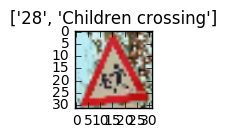

In [55]:
# use new_signs.p from Hanqiu Jiang
# https://github.com/KonArtist02/CarND-Traffic-Sign-Classifier-Project/blob/master/new_signs.p

%matplotlib inline

with open("new_signs.p", mode='rb') as f:
    new_signs = pickle.load(f)
    f.close()

X_new_signs = new_signs['data']
y_new_signs = new_signs['labels']

number_of_new_signs = len(X_new_signs)
print("Number of new signs:",number_of_new_signs)

index = random.randint(0, number_of_new_signs)
image = X_new_signs[index].squeeze()

plt.figure(figsize=(1,1))
plt.title(names[y_new_signs[index]+1])
plt.imshow(image)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I ran the evaluation over all 29 signs in the new_signs.p file.  In general, the quality of these images is better - sharper, higher contrast.

In [20]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_new_signs, y_new_signs)
    print("New Sign Test Accuracy = {:.3f}".format(test_accuracy))

New Sign Test Accuracy = 0.897


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
Looking at the plots below I can see 3 failures in classification out of the 29 signs.  This aligns to above accuracy assessment.

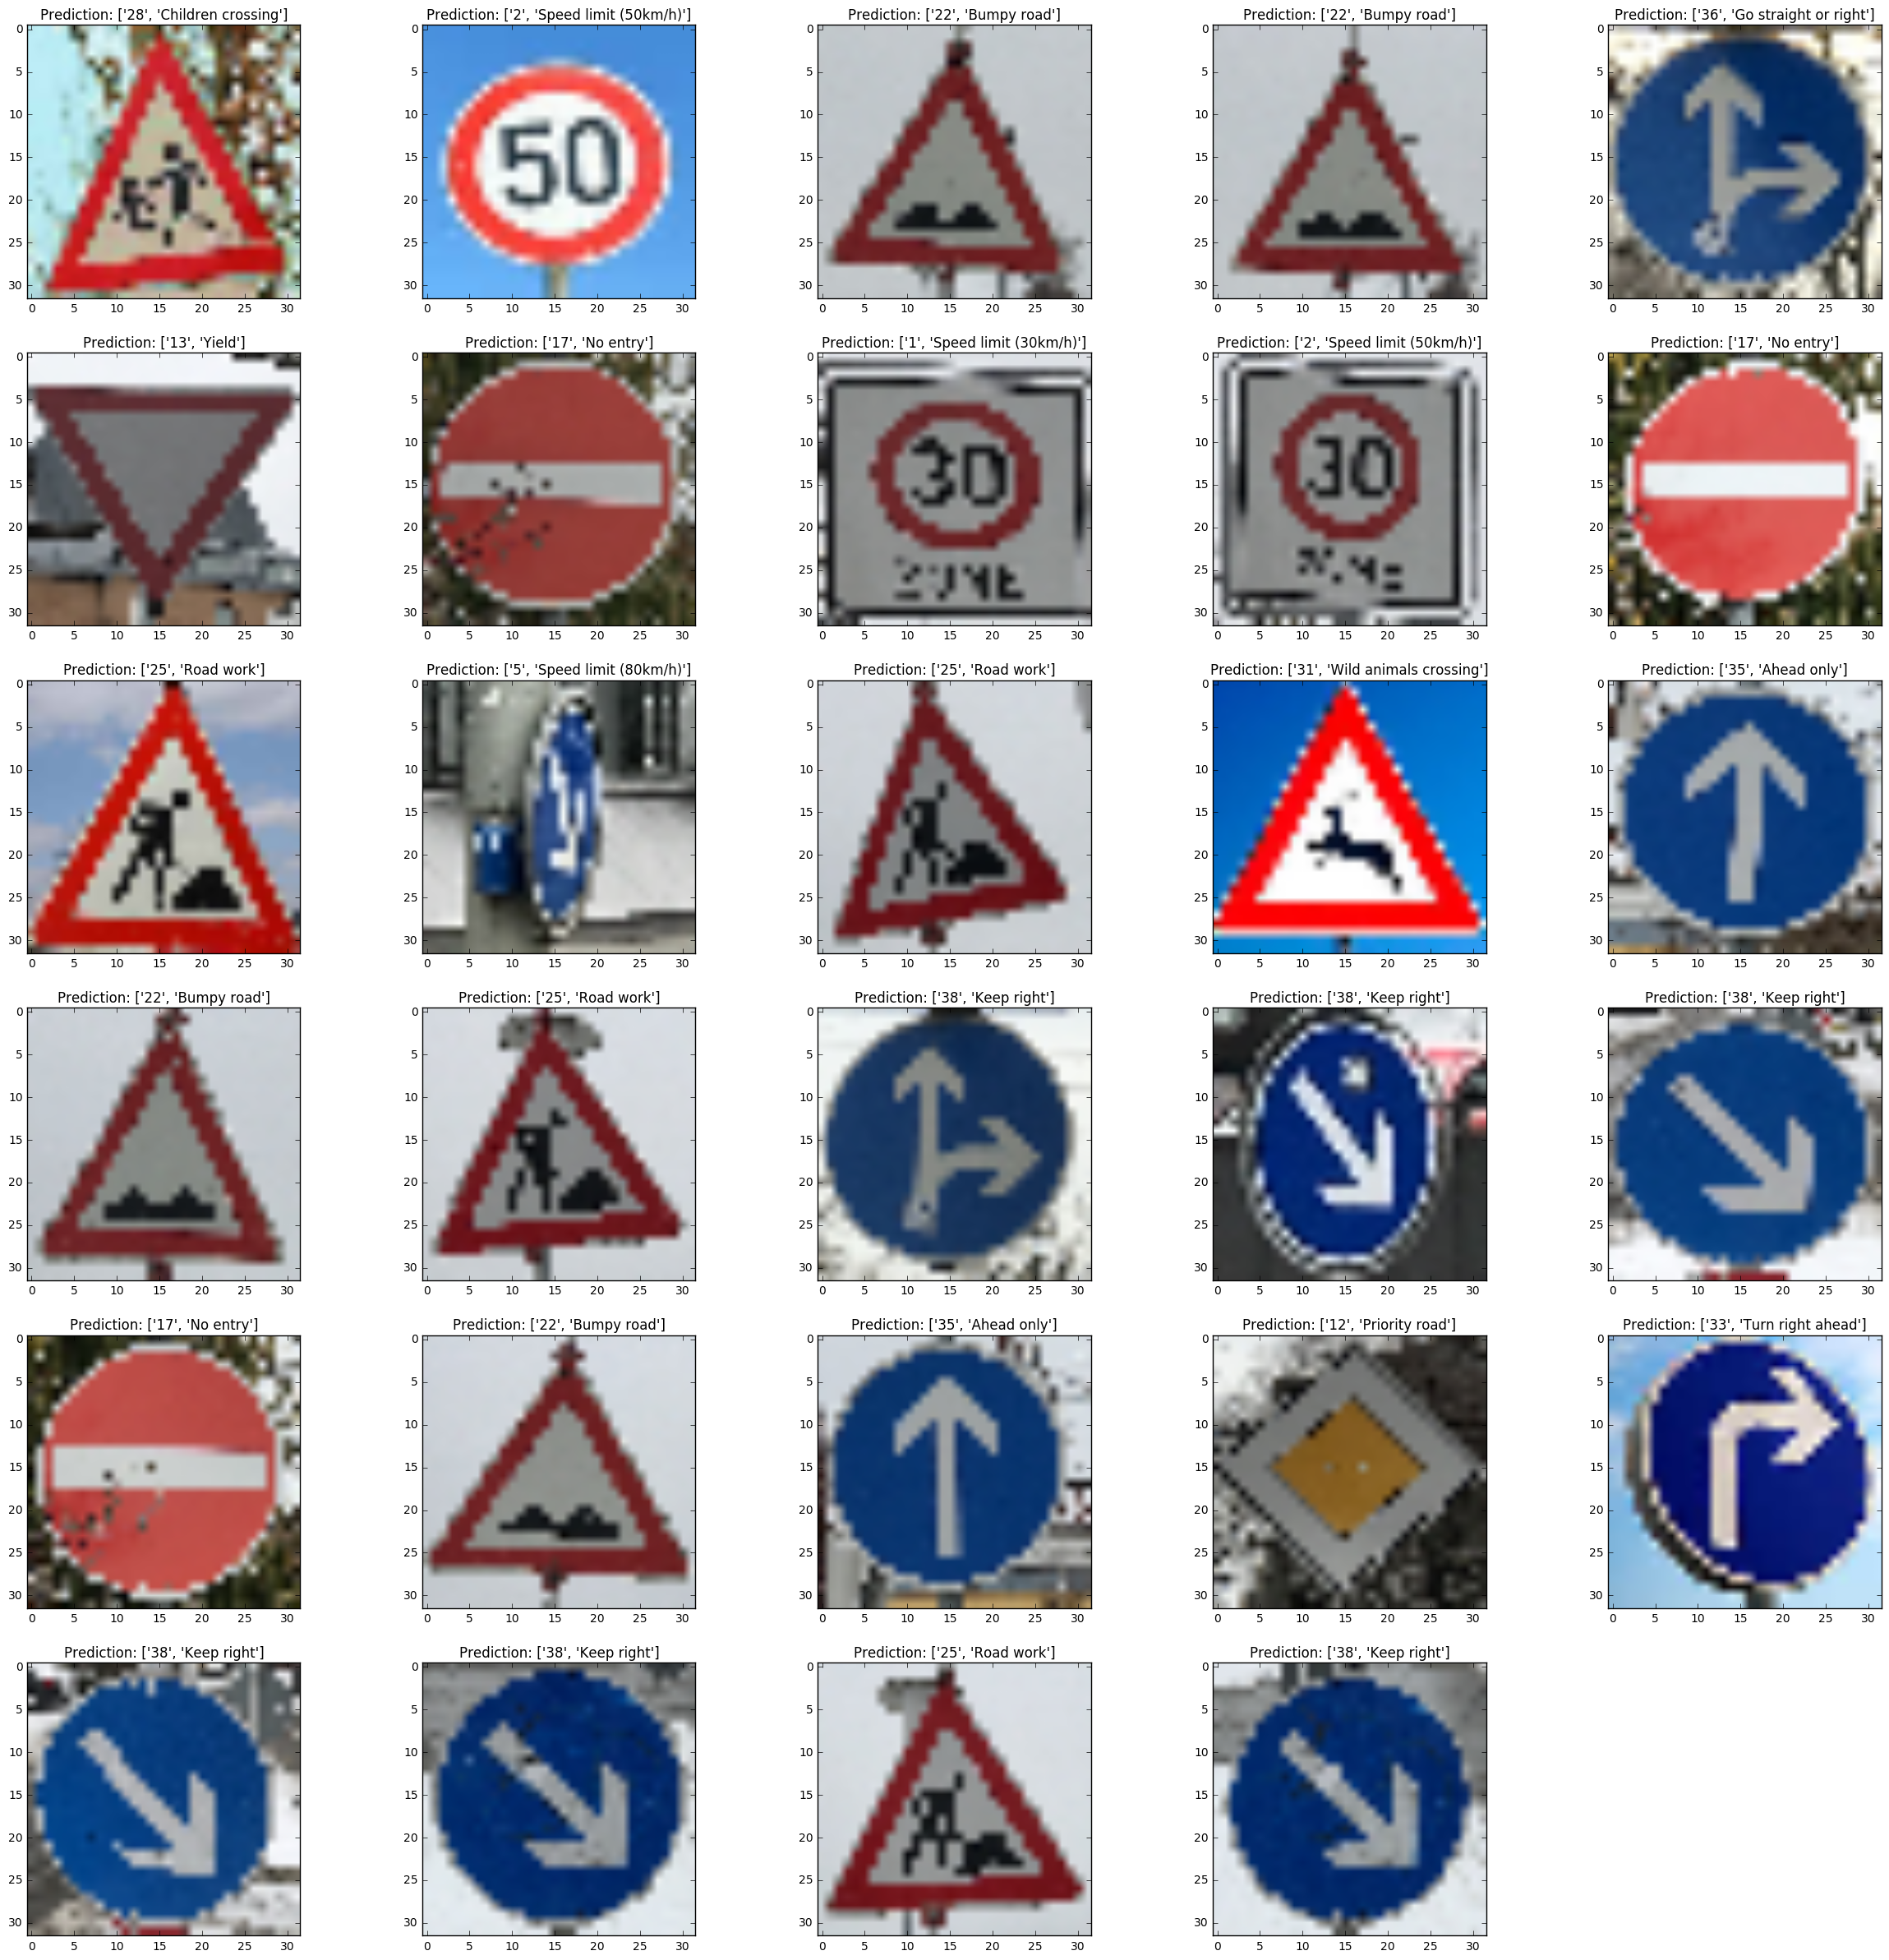

In [48]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

softmax = tf.nn.softmax(logits)
top_three_soft_op = tf.nn.top_k(softmax, 3)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top_three_soft = sess.run(top_three_soft_op, feed_dict={x: X_new_signs, y: y_new_signs, keep_prob:1})

plt.figure(figsize=(30, 30))
for i in range(y_new_signs.size):
    sub = plt.subplot(6, 5, i + 1)
    plt.imshow(X_new_signs[i])
    sub.set_title("Prediction: %s" % (names[top_three_soft[1][i][0] + 1]))

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
Looking at the output below this makes sense - the largest number for the first image is 1923 in the first row, which is identified 28 - correct.

In [50]:
top_three_op = tf.nn.top_k(logits, 3)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top_three = sess.run(top_three_op, feed_dict={x: X_new_signs, y: y_new_signs, keep_prob:1})
  
print(top_three)

TopKV2(values=array([[ 1923.44311523,   474.93017578,   369.53771973],
       [ 5761.18945312,  1753.58984375,  1327.98632812],
       [ 1894.13671875,  1387.45959473,  1074.95141602],
       [ 3011.48852539,  1061.35522461,  1028.08813477],
       [ 1216.89379883,  1099.87780762,   444.14309692],
       [ 2714.0234375 ,  -151.51811218,  -266.95181274],
       [ 1550.75708008,   542.66937256,   352.84753418],
       [  896.41345215,   748.50268555,   587.02514648],
       [  487.49093628,   298.34725952,   255.12265015],
       [ 2258.28637695,   706.68695068,   314.97198486],
       [ 2747.93530273,  1701.41271973,  1247.06506348],
       [  579.50042725,   316.27905273,   268.18051147],
       [ 2941.5715332 ,  1427.06713867,  1329.47192383],
       [ 6458.31835938,  2444.25561523,  2109.05151367],
       [ 1157.11035156,   823.71868896,   254.24746704],
       [ 2066.65429688,  1043.75671387,   874.73687744],
       [ 3032.98706055,   362.01583862,   328.41790771],
       [  805.954

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.